<a href="https://colab.research.google.com/github/seher13/Nba/blob/main/NBA_stats_2021_22_Web_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
from bs4 import BeautifulSoup

In [2]:
url = 'https://www.basketball-reference.com/leagues/NBA_2022_per_game.html'
data = requests.get(url).text

In [3]:
soup = BeautifulSoup(data, 'html5lib')

In [4]:
tables = soup.find_all('table')

In [5]:
len(tables)

1

In [6]:
df = pd.read_html(str(tables))[0]

In [7]:
df.iloc[:30,:]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,42,22,24.1,3.3,7.7,.425,0.4,1.2,.308,2.9,6.4,.448,.450,0.9,1.6,.545,2.3,5.0,7.2,1.2,0.5,0.6,1.0,2.1,7.8
1,2,Steven Adams,C,28,MEM,50,49,26.2,2.5,4.9,.514,0.0,0.0,NaN,2.5,4.9,.514,.514,1.5,2.6,.573,4.4,5.1,9.5,3.0,1.0,0.7,1.6,1.7,6.5
2,3,Bam Adebayo,C,24,MIA,28,28,33.3,6.8,13.0,.525,0.0,0.1,.000,6.8,12.9,.529,.525,4.5,5.9,.764,2.7,7.3,10.0,3.5,1.5,0.6,3.0,3.3,18.1
3,4,Santi Aldama,PF,21,MEM,27,0,10.3,1.4,3.6,.381,0.1,1.4,.103,1.2,2.1,.569,.402,0.4,0.7,.600,0.9,1.5,2.4,0.5,0.1,0.3,0.3,1.0,3.3
4,5,LaMarcus Aldridge,C,36,BRK,36,11,22.9,5.8,10.4,.555,0.3,1.1,.316,5.4,9.3,.582,.571,1.6,1.9,.853,1.5,4.1,5.6,0.9,0.4,1.1,0.9,1.8,13.4
5,6,Nickeil Alexander-Walker,SG,23,NOP,49,19,26.5,4.8,12.8,.374,1.9,6.1,.310,2.9,6.6,.434,.449,1.4,1.9,.726,0.7,2.6,3.3,2.8,0.8,0.4,1.7,1.7,12.9
6,7,Grayson Allen,SG,26,MIL,44,43,28.3,4.1,9.6,.424,2.6,6.6,.392,1.5,3.0,.496,.559,1.1,1.2,.870,0.6,3.0,3.5,1.5,0.8,0.3,0.6,1.4,11.8
7,8,Jarrett Allen,C,23,CLE,45,45,32.6,6.6,9.8,.674,0.0,0.2,.111,6.6,9.6,.686,.675,3.0,4.3,.691,3.5,7.4,11.0,1.9,0.8,1.4,1.8,1.8,16.2
8,9,Jose Alvarado,PG,23,NOP,25,1,12.0,1.6,4.2,.390,0.6,1.8,.318,1.1,2.4,.443,.457,0.5,0.8,.632,0.4,0.9,1.3,1.9,1.1,0.1,0.2,1.4,4.3
9,10,Justin Anderson,SF,28,TOT,6,0,12.8,1.0,3.2,.316,0.5,2.5,.200,0.5,0.7,.750,.395,1.0,1.2,.857,0.3,1.3,1.7,1.5,0.3,0.2,0.5,1.5,3.5


In [8]:
df2 = df[~df.Pos.str.contains('Pos')]

In [9]:
df2.head(30)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,42,22,24.1,3.3,7.7,.425,0.4,1.2,.308,2.9,6.4,.448,.450,0.9,1.6,.545,2.3,5.0,7.2,1.2,0.5,0.6,1.0,2.1,7.8
1,2,Steven Adams,C,28,MEM,50,49,26.2,2.5,4.9,.514,0.0,0.0,NaN,2.5,4.9,.514,.514,1.5,2.6,.573,4.4,5.1,9.5,3.0,1.0,0.7,1.6,1.7,6.5
2,3,Bam Adebayo,C,24,MIA,28,28,33.3,6.8,13.0,.525,0.0,0.1,.000,6.8,12.9,.529,.525,4.5,5.9,.764,2.7,7.3,10.0,3.5,1.5,0.6,3.0,3.3,18.1
3,4,Santi Aldama,PF,21,MEM,27,0,10.3,1.4,3.6,.381,0.1,1.4,.103,1.2,2.1,.569,.402,0.4,0.7,.600,0.9,1.5,2.4,0.5,0.1,0.3,0.3,1.0,3.3
4,5,LaMarcus Aldridge,C,36,BRK,36,11,22.9,5.8,10.4,.555,0.3,1.1,.316,5.4,9.3,.582,.571,1.6,1.9,.853,1.5,4.1,5.6,0.9,0.4,1.1,0.9,1.8,13.4
5,6,Nickeil Alexander-Walker,SG,23,NOP,49,19,26.5,4.8,12.8,.374,1.9,6.1,.310,2.9,6.6,.434,.449,1.4,1.9,.726,0.7,2.6,3.3,2.8,0.8,0.4,1.7,1.7,12.9
6,7,Grayson Allen,SG,26,MIL,44,43,28.3,4.1,9.6,.424,2.6,6.6,.392,1.5,3.0,.496,.559,1.1,1.2,.870,0.6,3.0,3.5,1.5,0.8,0.3,0.6,1.4,11.8
7,8,Jarrett Allen,C,23,CLE,45,45,32.6,6.6,9.8,.674,0.0,0.2,.111,6.6,9.6,.686,.675,3.0,4.3,.691,3.5,7.4,11.0,1.9,0.8,1.4,1.8,1.8,16.2
8,9,Jose Alvarado,PG,23,NOP,25,1,12.0,1.6,4.2,.390,0.6,1.8,.318,1.1,2.4,.443,.457,0.5,0.8,.632,0.4,0.9,1.3,1.9,1.1,0.1,0.2,1.4,4.3
9,10,Justin Anderson,SF,28,TOT,6,0,12.8,1.0,3.2,.316,0.5,2.5,.200,0.5,0.7,.750,.395,1.0,1.2,.857,0.3,1.3,1.7,1.5,0.3,0.2,0.5,1.5,3.5


In [10]:
df3 = df2.set_index('Rk')

In [11]:
df3.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,42,22,24.1,3.3,7.7,.425,0.4,1.2,.308,2.9,6.4,.448,.450,0.9,1.6,.545,2.3,5.0,7.2,1.2,0.5,0.6,1.0,2.1,7.8
2,Steven Adams,C,28,MEM,50,49,26.2,2.5,4.9,.514,0.0,0.0,NaN,2.5,4.9,.514,.514,1.5,2.6,.573,4.4,5.1,9.5,3.0,1.0,0.7,1.6,1.7,6.5
3,Bam Adebayo,C,24,MIA,28,28,33.3,6.8,13.0,.525,0.0,0.1,.000,6.8,12.9,.529,.525,4.5,5.9,.764,2.7,7.3,10.0,3.5,1.5,0.6,3.0,3.3,18.1
4,Santi Aldama,PF,21,MEM,27,0,10.3,1.4,3.6,.381,0.1,1.4,.103,1.2,2.1,.569,.402,0.4,0.7,.600,0.9,1.5,2.4,0.5,0.1,0.3,0.3,1.0,3.3
5,LaMarcus Aldridge,C,36,BRK,36,11,22.9,5.8,10.4,.555,0.3,1.1,.316,5.4,9.3,.582,.571,1.6,1.9,.853,1.5,4.1,5.6,0.9,0.4,1.1,0.9,1.8,13.4


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 652 entries, 1 to 591
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  652 non-null    object
 1   Pos     652 non-null    object
 2   Age     652 non-null    object
 3   Tm      652 non-null    object
 4   G       652 non-null    object
 5   GS      652 non-null    object
 6   MP      652 non-null    object
 7   FG      652 non-null    object
 8   FGA     652 non-null    object
 9   FG%     639 non-null    object
 10  3P      652 non-null    object
 11  3PA     652 non-null    object
 12  3P%     590 non-null    object
 13  2P      652 non-null    object
 14  2PA     652 non-null    object
 15  2P%     625 non-null    object
 16  eFG%    639 non-null    object
 17  FT      652 non-null    object
 18  FTA     652 non-null    object
 19  FT%     560 non-null    object
 20  ORB     652 non-null    object
 21  DRB     652 non-null    object
 22  TRB     652 non-null    object


In [13]:
seznam = np.arange(df3.shape[1])

In [14]:
seznam2 = np.delete(seznam, [0,1,3])

In [15]:
seznam2

array([ 2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28])

In [16]:
seznam3 = df3.columns[seznam2]

In [17]:
for heading in seznam3:
  df3[heading] = pd.to_numeric(df3[heading], errors='coerce')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 652 entries, 1 to 591
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  652 non-null    object 
 1   Pos     652 non-null    object 
 2   Age     652 non-null    int64  
 3   Tm      652 non-null    object 
 4   G       652 non-null    int64  
 5   GS      652 non-null    int64  
 6   MP      652 non-null    float64
 7   FG      652 non-null    float64
 8   FGA     652 non-null    float64
 9   FG%     639 non-null    float64
 10  3P      652 non-null    float64
 11  3PA     652 non-null    float64
 12  3P%     590 non-null    float64
 13  2P      652 non-null    float64
 14  2PA     652 non-null    float64
 15  2P%     625 non-null    float64
 16  eFG%    639 non-null    float64
 17  FT      652 non-null    float64
 18  FTA     652 non-null    float64
 19  FT%     560 non-null    float64
 20  ORB     652 non-null    float64
 21  DRB     652 non-null    float64
 22  TRB    

In [18]:
df3.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,42,22,24.1,3.3,7.7,0.425,0.4,1.2,0.308,2.9,6.4,0.448,0.450,0.9,1.6,0.545,2.3,5.0,7.2,1.2,0.5,0.6,1.0,2.1,7.8
2,Steven Adams,C,28,MEM,50,49,26.2,2.5,4.9,0.514,0.0,0.0,NaN,2.5,4.9,0.514,0.514,1.5,2.6,0.573,4.4,5.1,9.5,3.0,1.0,0.7,1.6,1.7,6.5
3,Bam Adebayo,C,24,MIA,28,28,33.3,6.8,13.0,0.525,0.0,0.1,0.000,6.8,12.9,0.529,0.525,4.5,5.9,0.764,2.7,7.3,10.0,3.5,1.5,0.6,3.0,3.3,18.1
4,Santi Aldama,PF,21,MEM,27,0,10.3,1.4,3.6,0.381,0.1,1.4,0.103,1.2,2.1,0.569,0.402,0.4,0.7,0.600,0.9,1.5,2.4,0.5,0.1,0.3,0.3,1.0,3.3
5,LaMarcus Aldridge,C,36,BRK,36,11,22.9,5.8,10.4,0.555,0.3,1.1,0.316,5.4,9.3,0.582,0.571,1.6,1.9,0.853,1.5,4.1,5.6,0.9,0.4,1.1,0.9,1.8,13.4


In [19]:
df3.sort_values('PTS', ascending=False).head(20)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
151,Kevin Durant,PF,33,BRK,36,36,36.5,10.5,20.3,0.520,1.9,5.0,0.372,8.7,15.3,0.568,0.566,6.3,7.1,0.894,0.6,6.9,7.4,5.8,0.8,0.9,3.0,1.9,29.3
267,LeBron James,SF,37,LAL,36,36,36.6,10.9,20.9,0.522,2.8,7.9,0.352,8.1,13.0,0.625,0.588,4.5,5.9,0.759,1.1,6.6,7.7,6.3,1.6,1.1,3.1,2.2,29.1
158,Joel Embiid,C,27,PHI,40,40,33.0,9.4,19.1,0.493,1.3,3.5,0.360,8.2,15.6,0.523,0.526,9.0,11.1,0.807,2.1,8.9,10.9,4.4,1.0,1.5,2.9,2.6,29.0
12,Giannis Antetokounmpo,PF,27,MIL,43,43,32.7,10.0,18.6,0.536,1.1,3.9,0.277,8.9,14.8,0.603,0.564,7.9,10.9,0.722,1.8,9.5,11.3,6.0,1.0,1.4,3.5,3.3,28.9
588,Trae Young,PG,23,ATL,47,47,34.6,9.4,20.6,0.457,2.9,7.8,0.378,6.5,12.9,0.504,0.528,6.1,6.9,0.892,0.6,3.4,4.0,9.3,1.0,0.1,4.1,1.6,27.9
132,DeMar DeRozan,PF,32,CHI,48,48,35.3,9.6,19.2,0.501,0.6,1.9,0.337,9.0,17.3,0.518,0.517,6.8,7.8,0.867,0.9,4.3,5.1,5.1,0.9,0.4,2.3,2.2,26.6
382,Ja Morant,PG,22,MEM,41,41,33.4,9.9,20.3,0.486,1.6,4.6,0.342,8.3,15.7,0.527,0.524,5.0,6.6,0.759,1.4,4.5,5.9,6.9,1.3,0.4,3.4,1.4,26.3
139,Luka Dončić,PG,22,DAL,38,38,35.3,9.4,21.2,0.446,2.5,8.0,0.309,7.0,13.2,0.529,0.504,4.8,6.6,0.735,0.9,8.0,8.9,9.1,1.2,0.4,4.4,2.3,26.2
283,Nikola Jokić,C,26,DEN,46,46,33.0,9.9,17.2,0.574,1.6,4.2,0.385,8.2,13.0,0.636,0.621,4.5,5.5,0.820,2.7,11.0,13.7,7.8,1.4,0.7,3.6,2.6,25.9


In [20]:
df3['EFF'] = df3['PTS'] +  df3['TRB'] + df3['AST'] + df3['STL'] + df3['BLK'] - df3['TOV']

In [21]:
df3.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
Rk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Precious Achiuwa,C,22,TOR,42,22,24.1,3.3,7.7,0.425,0.4,1.2,0.308,2.9,6.4,0.448,0.450,0.9,1.6,0.545,2.3,5.0,7.2,1.2,0.5,0.6,1.0,2.1,7.8,16.3
2,Steven Adams,C,28,MEM,50,49,26.2,2.5,4.9,0.514,0.0,0.0,NaN,2.5,4.9,0.514,0.514,1.5,2.6,0.573,4.4,5.1,9.5,3.0,1.0,0.7,1.6,1.7,6.5,19.1
3,Bam Adebayo,C,24,MIA,28,28,33.3,6.8,13.0,0.525,0.0,0.1,0.000,6.8,12.9,0.529,0.525,4.5,5.9,0.764,2.7,7.3,10.0,3.5,1.5,0.6,3.0,3.3,18.1,30.7
4,Santi Aldama,PF,21,MEM,27,0,10.3,1.4,3.6,0.381,0.1,1.4,0.103,1.2,2.1,0.569,0.402,0.4,0.7,0.600,0.9,1.5,2.4,0.5,0.1,0.3,0.3,1.0,3.3,6.3
5,LaMarcus Aldridge,C,36,BRK,36,11,22.9,5.8,10.4,0.555,0.3,1.1,0.316,5.4,9.3,0.582,0.571,1.6,1.9,0.853,1.5,4.1,5.6,0.9,0.4,1.1,0.9,1.8,13.4,20.5


In [22]:
top10 = df3.sort_values('EFF', ascending=False).head(10)

In [23]:
top10 = top10.reset_index().iloc[:,1:]
top10

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
0,Nikola Jokić,C,26,DEN,46,46,33.0,9.9,17.2,0.574,1.6,4.2,0.385,8.2,13.0,0.636,0.621,4.5,5.5,0.820,2.7,11.0,13.7,7.8,1.4,0.7,3.6,2.6,25.9,45.9
1,Giannis Antetokounmpo,PF,27,MIL,43,43,32.7,10.0,18.6,0.536,1.1,3.9,0.277,8.9,14.8,0.603,0.564,7.9,10.9,0.722,1.8,9.5,11.3,6.0,1.0,1.4,3.5,3.3,28.9,45.1
2,Joel Embiid,C,27,PHI,40,40,33.0,9.4,19.1,0.493,1.3,3.5,0.360,8.2,15.6,0.523,0.526,9.0,11.1,0.807,2.1,8.9,10.9,4.4,1.0,1.5,2.9,2.6,29.0,43.9
3,LeBron James,SF,37,LAL,36,36,36.6,10.9,20.9,0.522,2.8,7.9,0.352,8.1,13.0,0.625,0.588,4.5,5.9,0.759,1.1,6.6,7.7,6.3,1.6,1.1,3.1,2.2,29.1,42.7
4,Luka Dončić,PG,22,DAL,38,38,35.3,9.4,21.2,0.446,2.5,8.0,0.309,7.0,13.2,0.529,0.504,4.8,6.6,0.735,0.9,8.0,8.9,9.1,1.2,0.4,4.4,2.3,26.2,41.4
5,Kevin Durant,PF,33,BRK,36,36,36.5,10.5,20.3,0.520,1.9,5.0,0.372,8.7,15.3,0.568,0.566,6.3,7.1,0.894,0.6,6.9,7.4,5.8,0.8,0.9,3.0,1.9,29.3,41.2
6,Trae Young,PG,23,ATL,47,47,34.6,9.4,20.6,0.457,2.9,7.8,0.378,6.5,12.9,0.504,0.528,6.1,6.9,0.892,0.6,3.4,4.0,9.3,1.0,0.1,4.1,1.6,27.9,38.2
7,James Harden,PG,32,BRK,44,44,37.0,6.6,16.0,0.414,2.3,7.0,0.332,4.3,9.1,0.476,0.486,6.9,8.0,0.869,1.0,7.0,8.0,10.2,1.3,0.7,4.8,2.4,22.5,37.9
8,Anthony Davis,C,28,LAL,32,32,35.2,9.4,17.9,0.524,0.3,2.0,0.175,9.0,15.9,0.567,0.533,4.5,6.1,0.735,2.8,7.1,9.9,2.8,1.2,2.2,2.2,2.6,23.6,37.5
9,Ja Morant,PG,22,MEM,41,41,33.4,9.9,20.3,0.486,1.6,4.6,0.342,8.3,15.7,0.527,0.524,5.0,6.6,0.759,1.4,4.5,5.9,6.9,1.3,0.4,3.4,1.4,26.3,37.4


Text(0, 0.5, 'Steals')

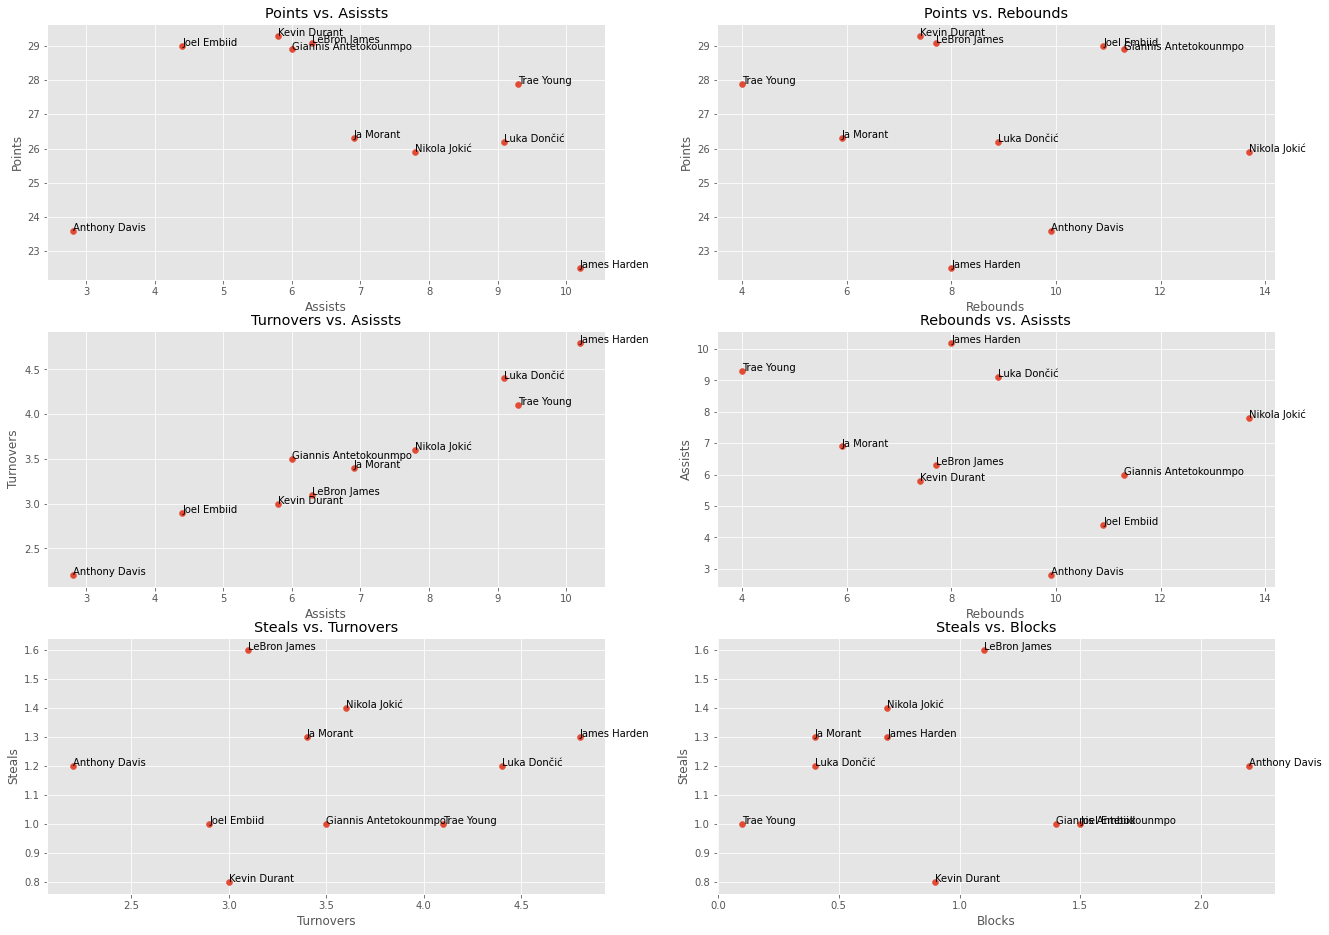

In [24]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(22,16))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)


ax1.scatter(top10['AST'], top10['PTS'])
for i, txt in enumerate(top10['Player']):
  ax1.annotate(txt, (top10.loc[i,'AST'], top10.loc[i,'PTS']))
ax1.set_title('Points vs. Asissts')
ax1.set_xlabel('Assists')
ax1.set_ylabel('Points')

ax2.scatter(top10['TRB'], top10['PTS'])
for i, txt in enumerate(top10['Player']):
  ax2.annotate(txt, (top10.loc[i,'TRB'], top10.loc[i,'PTS']))
ax2.set_title('Points vs. Rebounds')
ax2.set_xlabel('Rebounds')
ax2.set_ylabel('Points')

ax3.scatter(top10['AST'], top10['TOV'])
for i, txt in enumerate(top10['Player']):
  ax3.annotate(txt, (top10.loc[i,'AST'], top10.loc[i,'TOV']))
ax3.set_title('Turnovers vs. Asissts')
ax3.set_xlabel('Assists')
ax3.set_ylabel('Turnovers')


ax4.scatter(top10['TRB'], top10['AST'])
for i, txt in enumerate(top10['Player']):
  ax4.annotate(txt, (top10.loc[i,'TRB'], top10.loc[i,'AST']))
ax4.set_title('Rebounds vs. Asissts')
ax4.set_xlabel('Rebounds')
ax4.set_ylabel('Assists')

ax5.scatter(top10['TOV'], top10['STL'])
for i, txt in enumerate(top10['Player']):
  ax5.annotate(txt, (top10.loc[i,'TOV'], top10.loc[i,'STL']))
ax5.set_title('Steals vs. Turnovers')
ax5.set_xlabel('Turnovers')
ax5.set_ylabel('Steals')

ax6.scatter(top10['BLK'], top10['STL'])
for i, txt in enumerate(top10['Player']):
  ax6.annotate(txt, (top10.loc[i,'BLK'], top10.loc[i,'STL']))
ax6.set_title('Steals vs. Blocks')
ax6.set_xlabel('Blocks')
ax6.set_ylabel('Steals')



Text(0, 0.5, 'Free throw %')

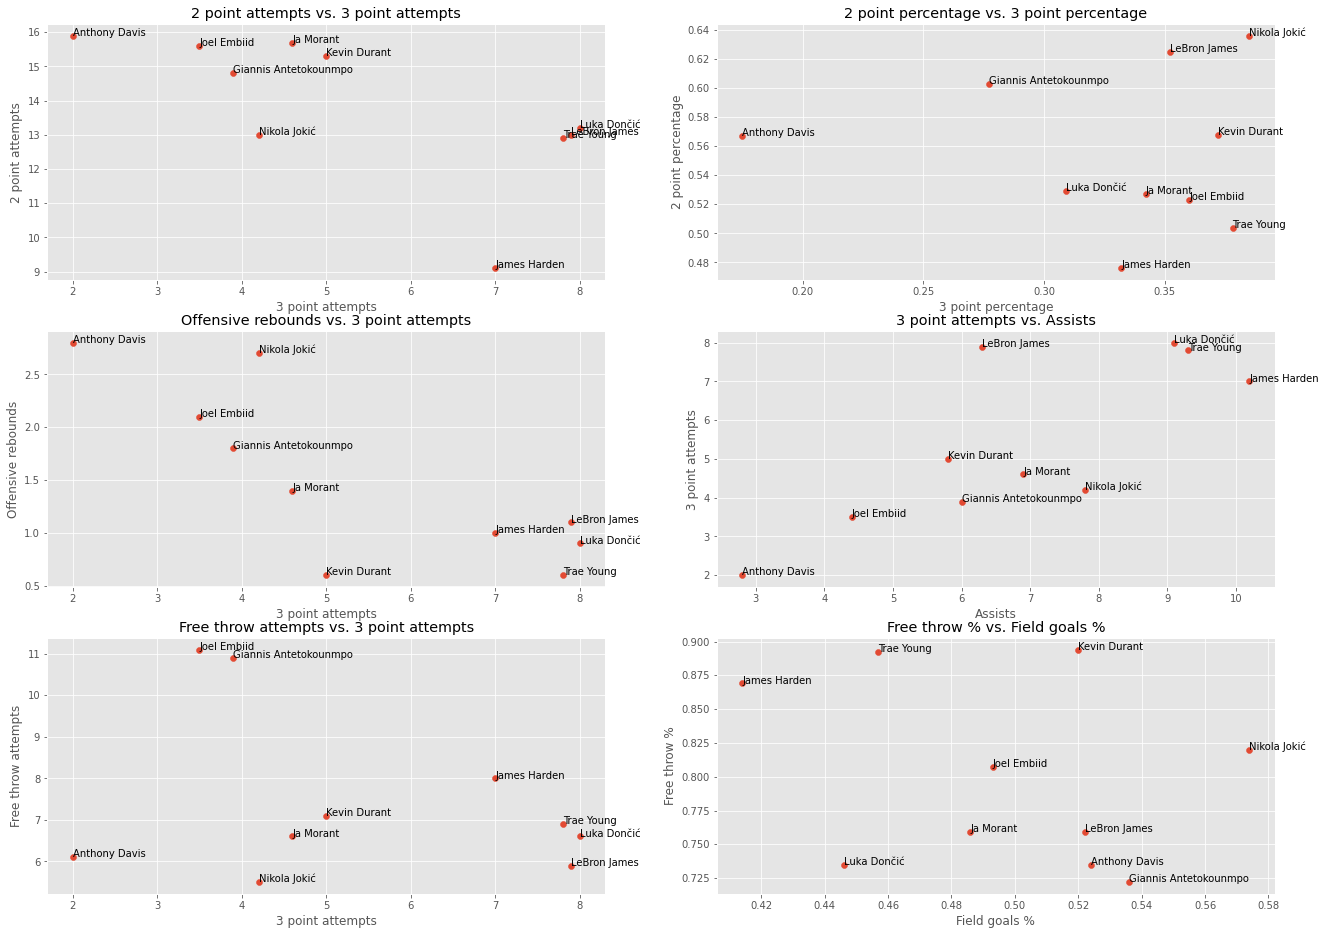

In [25]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(22,16))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)


ax1.scatter(top10['3PA'], top10['2PA'])
for i, txt in enumerate(top10['Player']):
  ax1.annotate(txt, (top10.loc[i,'3PA'], top10.loc[i,'2PA']))
ax1.set_title('2 point attempts vs. 3 point attempts')
ax1.set_xlabel('3 point attempts')
ax1.set_ylabel('2 point attempts')

ax2.scatter(top10['3P%'], top10['2P%'])
for i, txt in enumerate(top10['Player']):
  ax2.annotate(txt, (top10.loc[i,'3P%'], top10.loc[i,'2P%']))
ax2.set_title('2 point percentage vs. 3 point percentage')
ax2.set_xlabel('3 point percentage')
ax2.set_ylabel('2 point percentage')


ax3.scatter(top10['3PA'], top10['ORB'])
for i, txt in enumerate(top10['Player']):
  ax3.annotate(txt, (top10.loc[i,'3PA'], top10.loc[i,'ORB']))
ax3.set_title('Offensive rebounds vs. 3 point attempts')
ax3.set_xlabel('3 point attempts')
ax3.set_ylabel('Offensive rebounds')

ax4.scatter(top10['AST'], top10['3PA'])
for i, txt in enumerate(top10['Player']):
  ax4.annotate(txt, (top10.loc[i,'AST'], top10.loc[i,'3PA']))
ax4.set_title('3 point attempts vs. Assists')
ax4.set_xlabel('Assists')
ax4.set_ylabel('3 point attempts')

ax5.scatter(top10['3PA'], top10['FTA'])
for i, txt in enumerate(top10['Player']):
  ax5.annotate(txt, (top10.loc[i,'3PA'], top10.loc[i,'FTA']))
ax5.set_title('Free throw attempts vs. 3 point attempts')
ax5.set_xlabel('3 point attempts')
ax5.set_ylabel('Free throw attempts')

ax6.scatter(top10['FG%'], top10['FT%'])
for i, txt in enumerate(top10['Player']):
  ax6.annotate(txt, (top10.loc[i,'FG%'], top10.loc[i,'FT%']))
ax6.set_title('Free throw % vs. Field goals %')
ax6.set_xlabel('Field goals %')
ax6.set_ylabel('Free throw %')

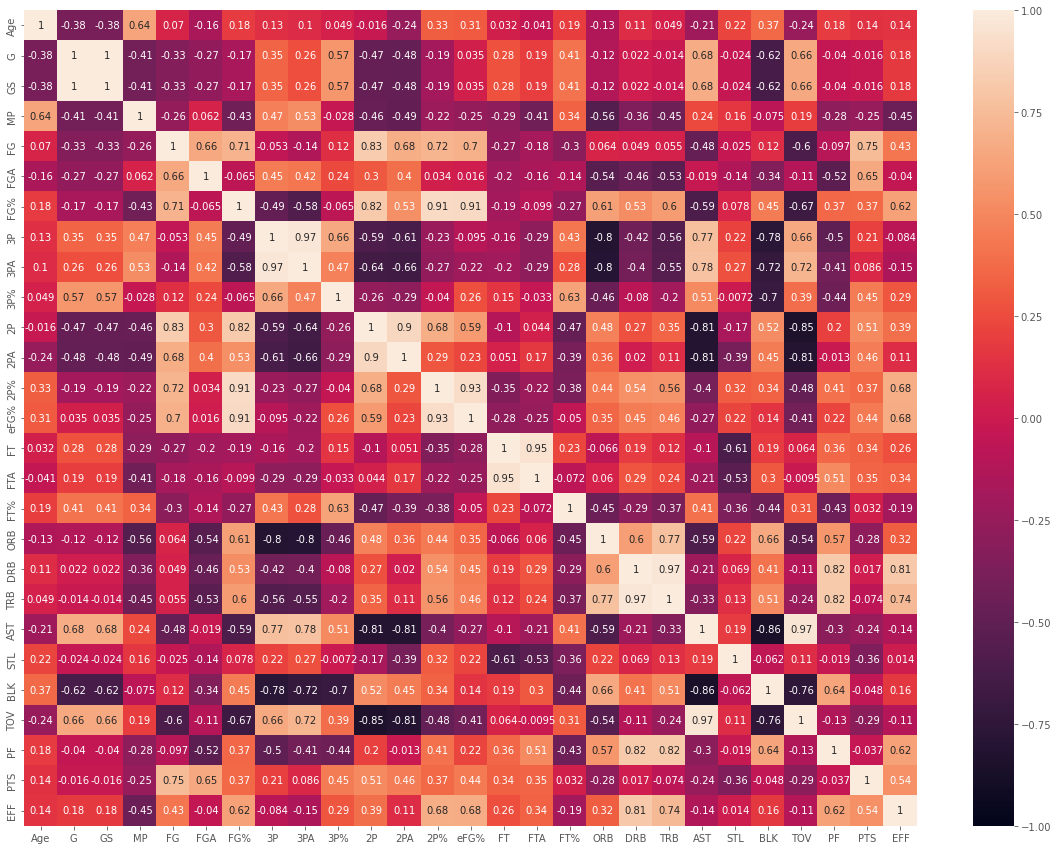

In [26]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(111)

corrMatrix = top10.corr()
ax1 = sns.heatmap(corrMatrix, vmin=-1, vmax=1, annot=True)
plt.show()

# Findings on top 10 NBA players based on efficacy
1. Age does not correlate with success of top 10 players
2. Minutes played have high negative correlation with offensive rebounds and with 2 points shot attempts. On the other hand it has high positive correlation with 3 point shot attempts -> Possible hypothesis: Players who play longer drive less to the basket, which saves them energy. Or players who play longer are playmakers, less likely to get rebounds and more likely to shoot for 3.
3. Field goals % has high correlation with field goals made, which is logical. Surprisingly there is no correlation with field goals attempts. Field goals percentage also has high positive correlation with 2 points attempts and rebounds. On the other hand high negative correlation with 3 points attempts. -> Possible hypothesis -> Players who play closer to the basket have higher field goals percentage as they have more dunks and lay ups.
4. Players who shoot more for 3 points shoot less for 2 points and less free throws as they are less fouls commited on them. They also have less rebounds and less blocks as they play more away from basket. The opposite as for players who shoot more for 3 points is valid for players who shoot more for 2 points.
5. Rebounds (offensive, defensive, total) are highly positively correlated, which is logical. 
6. Assist have high positive correlation with 3 points attempts, turnovers and games played. On the other hand it have high negative correlation with 2 points attempts and block. 
7. Efficacy has high positive correlation with % of field goals made, % of 2 points shots made, defensive and total rebounds. On the other hand there is no high negative corelation which would stand out.

In [27]:
all = df3[(df3['MP'] >= 12) & (df3['G'] >= 20)].reset_index()
all = all.iloc[:,1:]
all

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
0,Precious Achiuwa,C,22,TOR,42,22,24.1,3.3,7.7,0.425,0.4,1.2,0.308,2.9,6.4,0.448,0.450,0.9,1.6,0.545,2.3,5.0,7.2,1.2,0.5,0.6,1.0,2.1,7.8,16.3
1,Steven Adams,C,28,MEM,50,49,26.2,2.5,4.9,0.514,0.0,0.0,NaN,2.5,4.9,0.514,0.514,1.5,2.6,0.573,4.4,5.1,9.5,3.0,1.0,0.7,1.6,1.7,6.5,19.1
2,Bam Adebayo,C,24,MIA,28,28,33.3,6.8,13.0,0.525,0.0,0.1,0.000,6.8,12.9,0.529,0.525,4.5,5.9,0.764,2.7,7.3,10.0,3.5,1.5,0.6,3.0,3.3,18.1,30.7
3,LaMarcus Aldridge,C,36,BRK,36,11,22.9,5.8,10.4,0.555,0.3,1.1,0.316,5.4,9.3,0.582,0.571,1.6,1.9,0.853,1.5,4.1,5.6,0.9,0.4,1.1,0.9,1.8,13.4,20.5
4,Nickeil Alexander-Walker,SG,23,NOP,49,19,26.5,4.8,12.8,0.374,1.9,6.1,0.310,2.9,6.6,0.434,0.449,1.4,1.9,0.726,0.7,2.6,3.3,2.8,0.8,0.4,1.7,1.7,12.9,18.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,Thaddeus Young,PF,33,SAS,26,1,14.2,2.8,4.9,0.578,0.0,0.2,0.000,2.8,4.7,0.602,0.578,0.4,0.8,0.455,1.5,2.0,3.6,2.3,0.9,0.3,1.2,1.5,6.1,12.0
351,Trae Young,PG,23,ATL,47,47,34.6,9.4,20.6,0.457,2.9,7.8,0.378,6.5,12.9,0.504,0.528,6.1,6.9,0.892,0.6,3.4,4.0,9.3,1.0,0.1,4.1,1.6,27.9,38.2
352,Omer Yurtseven,C,23,MIA,37,10,14.8,2.7,5.1,0.524,0.0,0.2,0.143,2.6,4.9,0.538,0.526,0.9,1.4,0.640,1.8,4.5,6.2,1.1,0.4,0.5,0.9,1.8,6.2,13.5
353,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,0.567,0.0,0.1,0.000,1.9,3.2,0.593,0.567,1.4,1.8,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2,10.4


Text(0, 0.5, 'Steals')

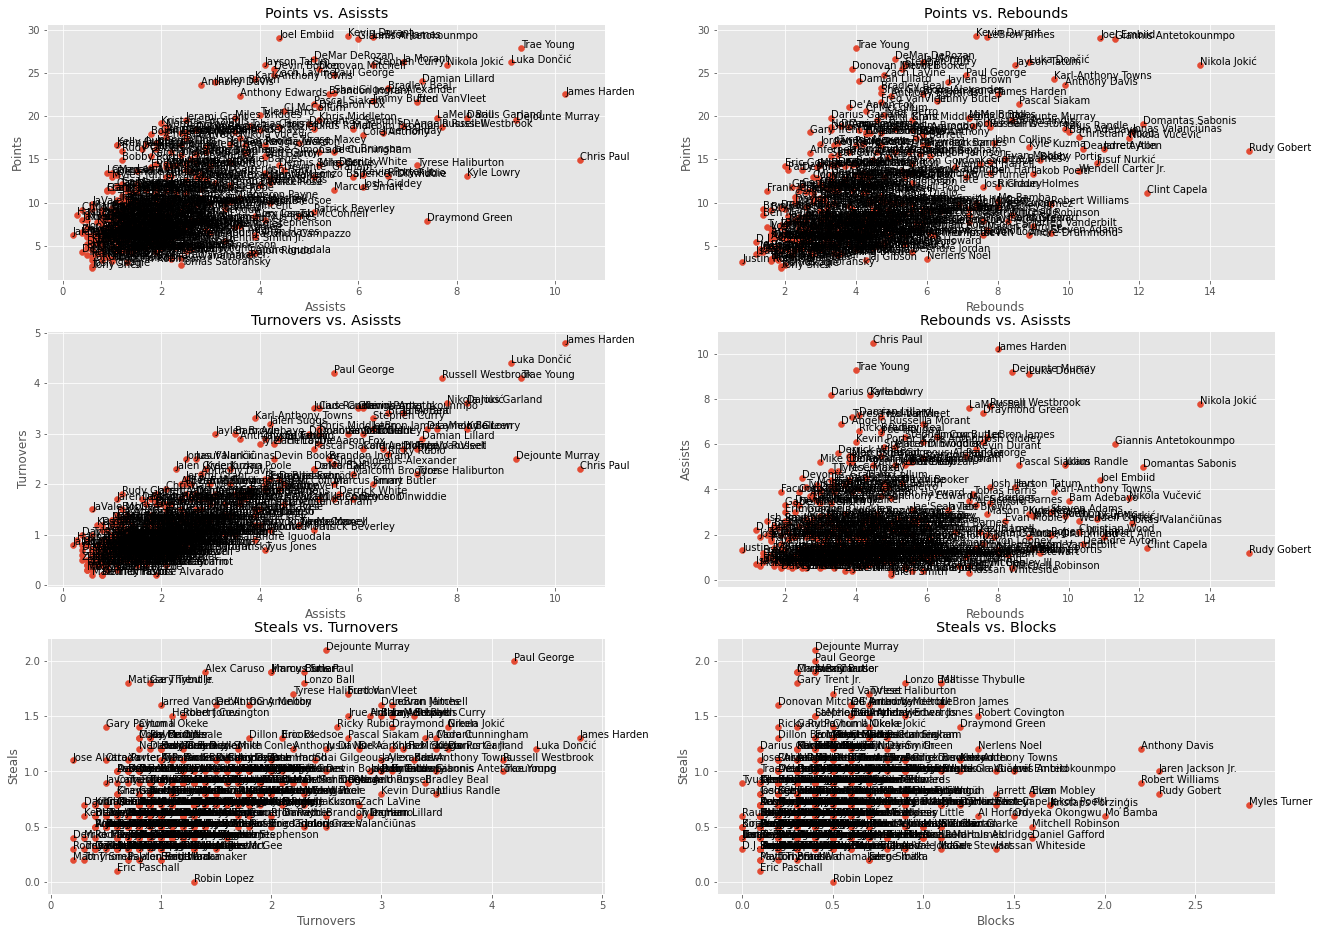

In [28]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(22,16))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)


ax1.scatter(all['AST'], all['PTS'])
for i, txt in enumerate(all['Player']):
  ax1.annotate(txt, (all.loc[i,'AST'], all.loc[i,'PTS']))
ax1.set_title('Points vs. Asissts')
ax1.set_xlabel('Assists')
ax1.set_ylabel('Points')

ax2.scatter(all['TRB'], all['PTS'])
for i, txt in enumerate(all['Player']):
  ax2.annotate(txt, (all.loc[i,'TRB'], all.loc[i,'PTS']))
ax2.set_title('Points vs. Rebounds')
ax2.set_xlabel('Rebounds')
ax2.set_ylabel('Points')

ax3.scatter(all['AST'], all['TOV'])
for i, txt in enumerate(all['Player']):
  ax3.annotate(txt, (all.loc[i,'AST'], all.loc[i,'TOV']))
ax3.set_title('Turnovers vs. Asissts')
ax3.set_xlabel('Assists')
ax3.set_ylabel('Turnovers')


ax4.scatter(all['TRB'], all['AST'])
for i, txt in enumerate(all['Player']):
  ax4.annotate(txt, (all.loc[i,'TRB'], all.loc[i,'AST']))
ax4.set_title('Rebounds vs. Asissts')
ax4.set_xlabel('Rebounds')
ax4.set_ylabel('Assists')

ax5.scatter(all['TOV'], all['STL'])
for i, txt in enumerate(all['Player']):
  ax5.annotate(txt, (all.loc[i,'TOV'], all.loc[i,'STL']))
ax5.set_title('Steals vs. Turnovers')
ax5.set_xlabel('Turnovers')
ax5.set_ylabel('Steals')

ax6.scatter(all['BLK'], all['STL'])
for i, txt in enumerate(all['Player']):
  ax6.annotate(txt, (all.loc[i,'BLK'], all.loc[i,'STL']))
ax6.set_title('Steals vs. Blocks')
ax6.set_xlabel('Blocks')
ax6.set_ylabel('Steals')

Text(0, 0.5, 'Free throw %')

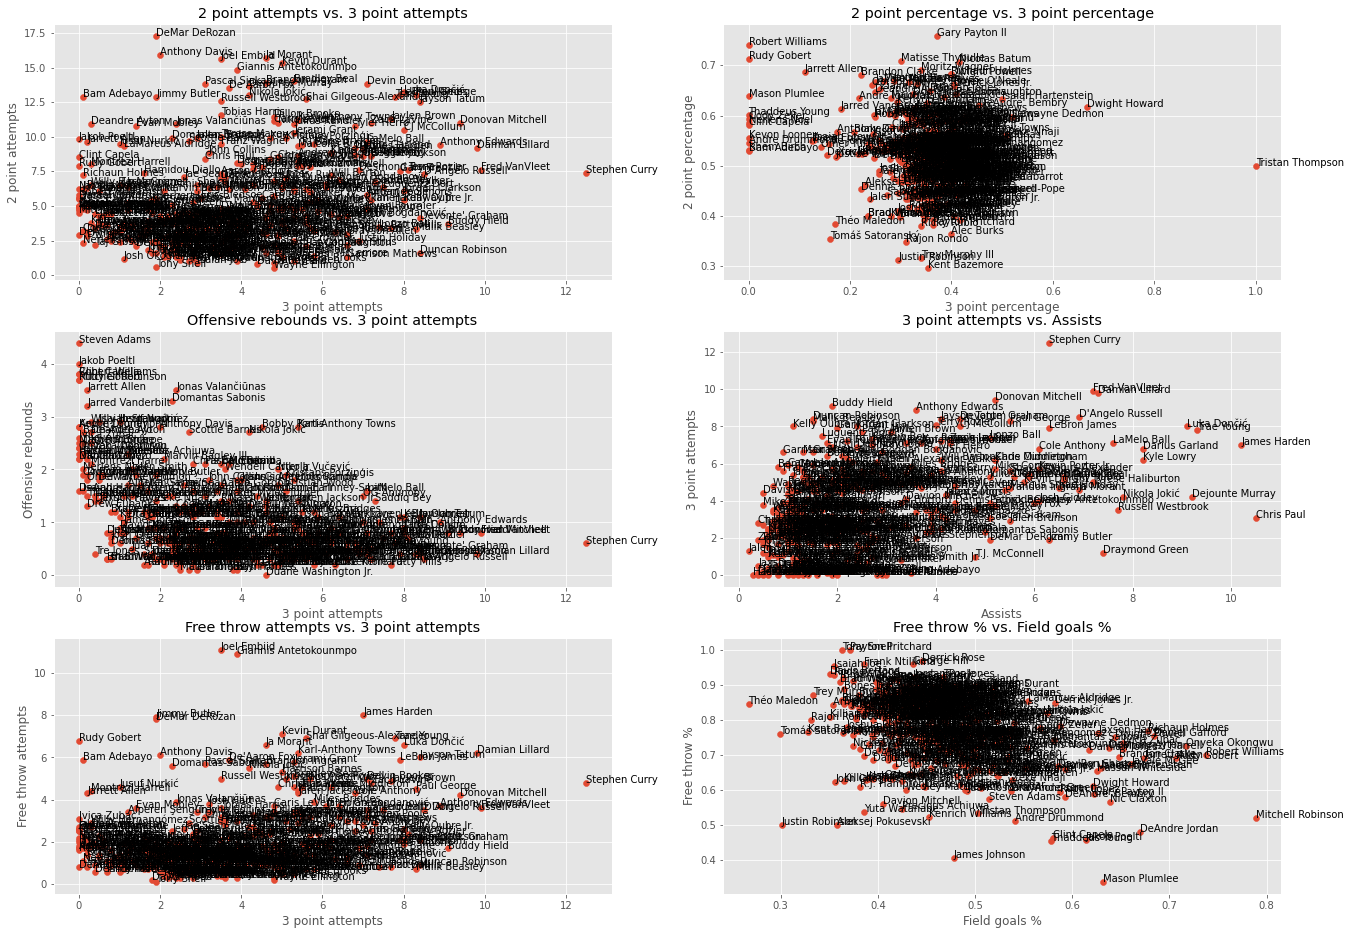

In [29]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(22,16))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)


ax1.scatter(all['3PA'], all['2PA'])
for i, txt in enumerate(all['Player']):
  ax1.annotate(txt, (all.loc[i,'3PA'], all.loc[i,'2PA']))
ax1.set_title('2 point attempts vs. 3 point attempts')
ax1.set_xlabel('3 point attempts')
ax1.set_ylabel('2 point attempts')

ax2.scatter(all['3P%'], all['2P%'])
for i, txt in enumerate(all['Player']):
  ax2.annotate(txt, (all.loc[i,'3P%'], all.loc[i,'2P%']))
ax2.set_title('2 point percentage vs. 3 point percentage')
ax2.set_xlabel('3 point percentage')
ax2.set_ylabel('2 point percentage')


ax3.scatter(all['3PA'], all['ORB'])
for i, txt in enumerate(all['Player']):
  ax3.annotate(txt, (all.loc[i,'3PA'], all.loc[i,'ORB']))
ax3.set_title('Offensive rebounds vs. 3 point attempts')
ax3.set_xlabel('3 point attempts')
ax3.set_ylabel('Offensive rebounds')

ax4.scatter(all['AST'], all['3PA'])
for i, txt in enumerate(all['Player']):
  ax4.annotate(txt, (all.loc[i,'AST'], all.loc[i,'3PA']))
ax4.set_title('3 point attempts vs. Assists')
ax4.set_xlabel('Assists')
ax4.set_ylabel('3 point attempts')

ax5.scatter(all['3PA'], all['FTA'])
for i, txt in enumerate(all['Player']):
  ax5.annotate(txt, (all.loc[i,'3PA'], all.loc[i,'FTA']))
ax5.set_title('Free throw attempts vs. 3 point attempts')
ax5.set_xlabel('3 point attempts')
ax5.set_ylabel('Free throw attempts')

ax6.scatter(all['FG%'], all['FT%'])
for i, txt in enumerate(all['Player']):
  ax6.annotate(txt, (all.loc[i,'FG%'], all.loc[i,'FT%']))
ax6.set_title('Free throw % vs. Field goals %')
ax6.set_xlabel('Field goals %')
ax6.set_ylabel('Free throw %')

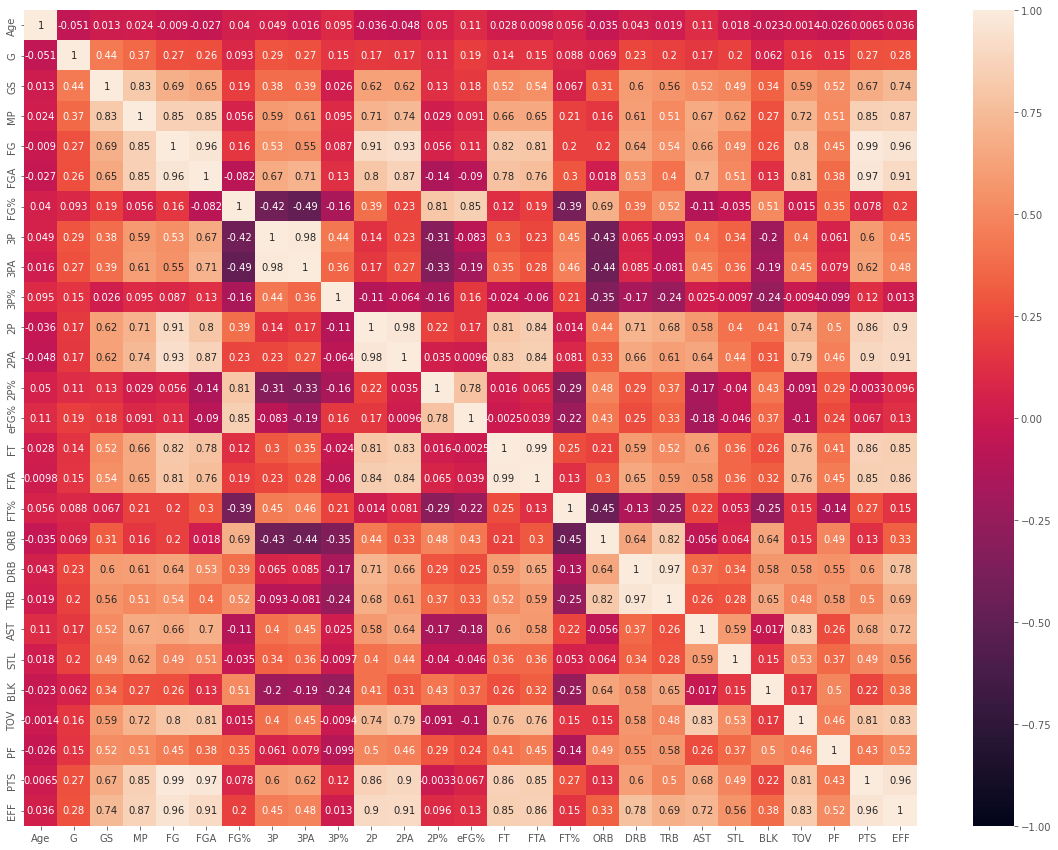

In [30]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(111)

corrMatrix = all.corr()
ax1 = sns.heatmap(corrMatrix, vmin=-1, vmax=1, annot=True)
plt.show()

# Findings on correlations for NBA all players that played more than 20 games with average more than 12 minutes played
If we compare findings with top10 NBA players, we immediately see, that there is far less negative correlations as with top10 NBA players. Furthermore, all strong correlations are positive.
1. Age does not correlate with success
2. Minutes played and games started: In general for players who started more games and play more minutes there are only a few parameters which are not higly positively correlated. This means, that in general player better players are better in almost all statistical categories (all but turnovers are positive in terms of play). They also have more time to fill the statistics, as they play more time per game.
3. Interestingly, field goals percentage only have high positive correlation with free throws percentage and two points percentage and does not have high corelation with any other statistical parameters, meaning it does not influence significatnly on other parameters.
4. Players who shoot more for three points have higher field goals attempts and score more points, which is logical. 2 points attempts are highly correlated with almost all statistical parameters with excepetion of 3 points shots statistics. This which is a lot different comparing to top10 NBA players, prooving the best players are outliers.
5. Same as with top10 NBA players rebounds (offensive, defensive, total) are highly positively correlated, which is logical. There is also high positive correlation with blocks.
6. Assists have high positive correlation with field goals, 2 points shots, free throw, steals, points and turnovers statistics.
7. Steals do not have high positive correlation with any of other statistical parameters. The highest with minutes played.
8. Turnovers is negative statistical parameter in terms of play. Hoeever, it has high correlation with efficacy and other positive statistical parameters, meaning better players also make more mistakes, as they have ball more in their hands.
9. Efficiency is highly correlated with games started, field goals attempts, 2 points attempts, free throws attempts, rebounds, assists, turnovers and points, which is basicaly the equation for EFF (with exceptio of turnovers, which should be negatively correlated (explained above).


This observations are a lot different comparing to top10 NBA players, prooving the best players are outliers.